# Análise de Hipóteses - Departamento de Marketing Loja Online

# Conteúdo <a id='back'></a>

* [1) Objetivo do Projeto](#projectgoal)
* [2) Preparação de Dados](#data_preprocessing)
* [3) Parte 1 - Priorizando Hipóteses](#hypoteses)
* [4) Parte 2 - Análise de teste A/B](#testA/B)
* [5) Conclusão Geral](#end)

 # Objetivo do projeto

Junto ao departamento de marketing, o objetivo desse projeto é compilar uma lista de hipóteses que podem ajudar a aumentar a receita da loja online, priorizando as hipóteses, e lançando um teste A/B com análise dos resultados.

# Preparação de dados

In [98]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from math import factorial
import datetime as dt
from scipy import stats # Carregando todas as bibliotecas

In [99]:
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep = ';') # Carregando o arquivo de dados em DataFrame e corrigindo o tipo de dados
orders_df = pd.read_csv('/datasets/orders_us.csv', sep = ',')
visits_df = pd.read_csv('/datasets/visits_us.csv', sep = ',')

In [100]:
hypotheses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [101]:
hypotheses_df.columns = [col.lower() for col in hypotheses_df.columns] # Renomeando as colunas para letras minúsculas

In [102]:
hypotheses_df.head(10)

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [103]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [104]:
# Declarando um dicionário com os nomes antigos das colunas como as chaves
# e os novos nomes de colunas como os valores
columns_new ={
    "transactionId": "transaction_id",
    "visitorId": "visitor_id",
    }

# Chamando o método rename e passando
# o dicionário como um argumento para o parâmetro columns
orders_df = orders_df.rename(columns = columns_new)
print(orders_df.columns)

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')


In [105]:
orders_df.head(10)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [106]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [107]:
visits_df.head(10)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [108]:
print(hypotheses_df.isna().sum()) #calculando o número de valores ausentes de visits_df
print()
print(orders_df.isna().sum()) #calculando o número de valores ausentes de orders_df
print()
print(visits_df.isna().sum()) #calculando o número de valores ausentes de costs_df

hypothesis    0
reach         0
impact        0
confidence    0
effort        0
dtype: int64

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date      0
group     0
visits    0
dtype: int64


In [109]:
print(hypotheses_df.duplicated().sum()) #Contando duplicados explícitos de visits_df
print()
print(orders_df.duplicated().sum()) #Contando duplicados explícitos de orders_df
print()
print(visits_df.duplicated().sum()) #Contando duplicados explícitos de costs_df

0

0

0


Não foram encontrados dados duplicados ou ausentes em nenhum dos 3 DF's, e os tipos dados foram convertidos de acordo com a necessidade. E conforme as boas práticas de estilo, transformamos os nomes das colunas em letras minúsculas para evitar erros do Data Frame "hypotheses" "orders" e "visits", e separando com "_" nos nomes das colunas dos mesmos.

# Parte 1 - Priorizando Hipóteses

Vamos começar com a criação de uma lista de hipóteses para aumentar a receita da loja online. Para priorizar as hipóteses, podemos usar um método como o ICE Score, que avalia cada hipótese com base em Impacto (Impact), Confiança (Confidence) e Facilidade (Ease). Cada fator é avaliado em uma escala de 1 a 10.

In [110]:
print(hypotheses_df)

hypotheses_df['ICE'] = (hypotheses_df['impact']*hypotheses_df['confidence'])/ hypotheses_df['effort']

print(hypotheses_df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort  
0           8       6  
1           4      10  
2           7       3  
3           3       8  
4           1       1  
5           2       3  
6           8       3  
7           8       5  
8           9       5  
                                          hypothe

O método ICE dá 8, 0, 7 e 6 como as hipóteses mais promissoras. A hipótese 8 tem a maior pontuação ICE, como "Launch a promotion that gives users discounts" e a hipótese 0 , como "Add two new channels for attracting traffic", são aquelas que combinam alto impacto e confiança, apesar de exigirem esforço moderado. Vamos verificar uma versão modificada, RICE:

In [111]:
print(hypotheses_df)

hypotheses_df['RICE'] = (hypotheses_df['reach']*hypotheses_df['impact']*hypotheses_df['confidence'])/ hypotheses_df['effort']

print(hypotheses_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis  reach  impact  \
0  Add two new channels for attracting traffic. T...      3      10   
1  Launch your own delivery service. This will sh...      2       5   
2  Add product recommendation blocks to the store...      8       3   
3  Change the category structure. This will incre...      8       3   
4  Change the background color on the main page. ...      3       1   
5  Add a customer review page. This will increase...      3       2   
6  Show banners with current offers and sales on ...      5       3   
7  Add a subscription form to all the main pages....     10       7   
8  Launch a promotion that gives users discounts ...      1       9   

   confidence  effort        ICE  
0           8       6  13.333333  
1           4      10   2.000000  
2           7       3   7.000000  
3           3       8   1.125000  
4           1       1   1.000000  
5           2       3   1.333333  
6           8       3   8.000000  
7        

Aqui, as hipóteses mais promissoras são 7, 2, 0 e 6. No entanto, desta vez, o número 7 ficou em primeiro lugar. As hipóteses com maior pontuação RICE, 7 e 2, são aquelas que combinam alto alcance, impacto e confiança, com esforço relativamente baixo. Já a hipótese 4 têm baixa prioridade devido ao baixo impacto e confiança, mesmo com baixo esforço.

Para entender como a priorização de hipóteses muda ao usar o método RICE em vez do método ICE, primeiro, vamos comparar as duas listas acima das hipóteses ordenadas pela pontuação de cada método.

In [112]:
print(hypotheses_df[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))
print()
print(hypotheses_df[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                          hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2

Por exemplo, a hipótese 8 tem hipótese tem um alto impacto e confiança, mas seu alcance muito baixo diminui sua prioridade no método RICE. Já a hipótese 7, tem o alcance (Reach) muito alto, o que faz sua pontuação RICE disparar. Isso demonstra que adicionar o critério de alcance pode aumentar significativamente a prioridade de hipóteses que afetam muitos usuários. 

A principal mudança ao usar RICE em vez de ICE é a consideração do alcance, que pode elevar significativamente a prioridade de hipóteses que impactam muitos usuários, mesmo que o esforço e a confiança não sejam os mais altos. Isso destaca a importância de quantificar quantos usuários serão afetados por uma mudança, além de apenas considerar o impacto e a confiança.

# Parte 2 - Análise de teste A/B

Realizou-se um teste A/B e os resultados foram descritos nos DataFrames "orders" e "visits".

* Gráfico da receita acumulada por grupo.

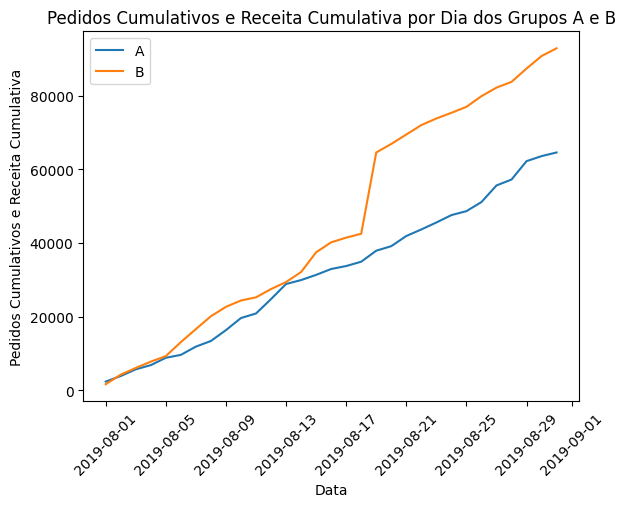

In [113]:
orders_df['date'] = pd.to_datetime(orders_df['date'], format='%Y-%m-%d')
visits_df['date'] = pd.to_datetime(visits_df['date'], format='%Y-%m-%d')
    
datesGroups = orders_df[['date', 'group']].drop_duplicates() # Criando um DataFrame chamado datesGroups com pares de 'date' unívocos e os valores de 'group' da tabela orders. Eliminando valores duplicados usando o método drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_df[
        np.logical_and(
            orders_df['date'] <= x['date'], orders_df['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(
    lambda x: visits_df[
        np.logical_and(
            visits_df['date'] <= x['date'], visits_df['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visits',
]

# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame com pedidos cumulativos e receita cumulativa por dia, grupo B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# construindo o gráfico de receita do grupo A 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# construindo o gráfico de receita do grupo B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Data')
plt.ylabel('Pedidos Cumulativos e Receita Cumulativa')
plt.title('Pedidos Cumulativos e Receita Cumulativa por Dia dos Grupos A e B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Os dados indicam que o grupo B teve um desempenho significativamente melhor em termos de receita e número de pedidos. É possível que o grupo B tenha sido alvo de uma campanha de marketing ou promoção específica que levou ao aumento significativo em pedidos e receita. Melhorias na experiência do usuário para o grupo B podem ter contribuído para a maior taxa de conversão e, consequentemente, maior receita e número de pedidos.

* Gráfico do tamanho médio acumulado do pedido por grupo. 

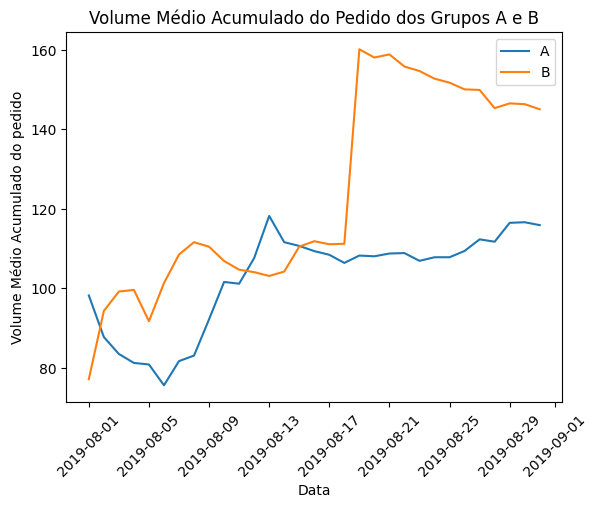

In [114]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Data')
plt.ylabel('Volume Médio Acumulado do pedido')
plt.title('Volume Médio Acumulado do Pedido dos Grupos A e B')
plt.xticks(rotation=45)
plt.legend()
plt.show()

O valor cumulativo dos volumes médios de compras dos segmentos ainda apresenta flutuações. Ainda é cedo demais para tomar decisões com base nessa métrica. Ou talvez seja necessário analisar os valores atípicos que estão distorcendo os resultados.

* Gráfico da diferença relativa no volume médio acumulado do pedido para o grupo B em comparação com o grupo A. 

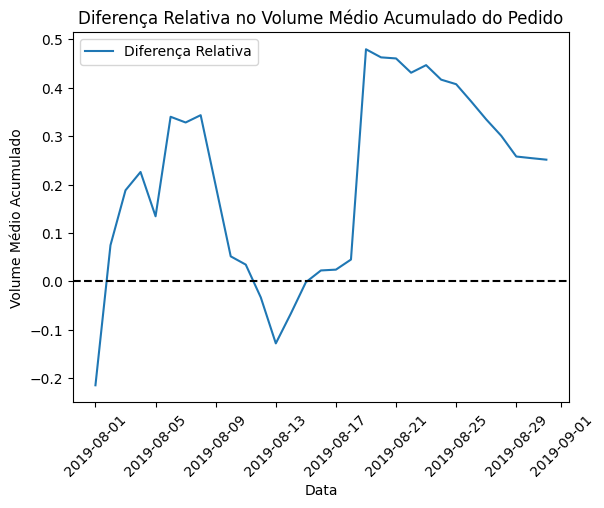

In [115]:
# reunindo os dados em um DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# construindo um gráfico de diferença relativa para os volumes médios de compra
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label='Diferença Relativa')

# acrescentando o eixo X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Volume Médio Acumulado')
plt.title('Diferença Relativa no Volume Médio Acumulado do Pedido')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Em vários pontos, a diferença entre os segmentos apresenta picos. Isso indica a ocorrência de pedidos grandes e valores atípicos.

* Gráfico da diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A.

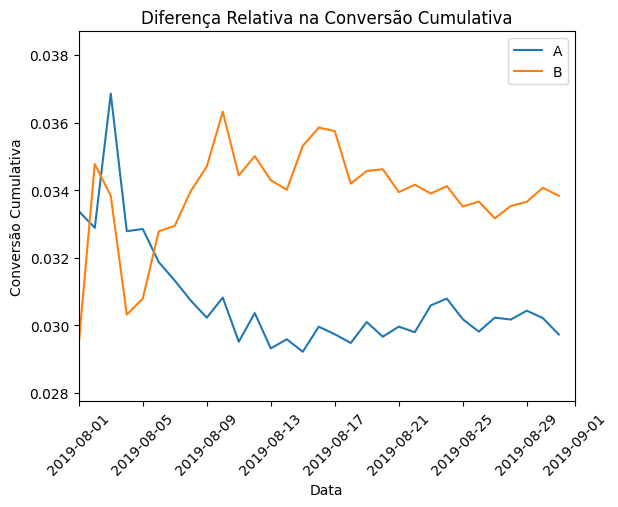

In [142]:
# calculando a conversão cumulativa
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

# selecionando dados no grupo A
cumulativeDataA = cumulativeData[cumulativeData['group'] =='A']

# Selecionando dados no grupo B
cumulativeDataB = cumulativeData[cumulativeData['group'] =='B']

# construindo os gráficos
plt.plot(cumulativeDataA['date'].values, cumulativeDataA['conversion'].values, label='A')
plt.plot(cumulativeDataB['date'].values, cumulativeDataB['conversion'].values, label='B')
plt.legend()

# definindo a escala dos eixos

ymin = min(cumulativeDataA['conversion'].min(), cumulativeDataB['conversion'].min())*0.95
ymax = max(cumulativeDataA['conversion'].max(), cumulativeDataB['conversion'].max())*1.05
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), ymin, ymax])

plt.xlabel('Data')
plt.ylabel('Conversão Cumulativa')
plt.title('Diferença Relativa na Conversão Cumulativa')
plt.xticks(rotation=45)
plt.legend()
plt.show()

De maneira geral, o grupo B apresenta uma conversão cumulativa consistentemente mais alta do que o grupo A ao longo do período observado. Isso sugere que as mudanças implementadas no grupo B tiveram um impacto positivo na taxa de conversão.

 * A taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia.

No handles with labels found to put in legend.
No handles with labels found to put in legend.


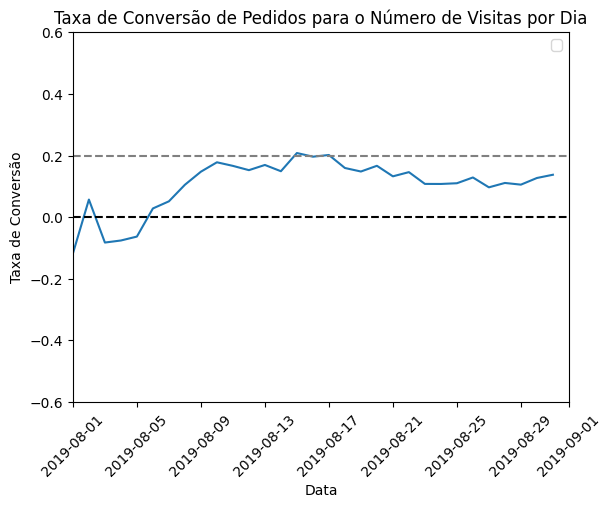

In [137]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.6, 0.6])
plt.xlabel('Data')
plt.ylabel('Taxa de Conversão')
plt.title('Taxa de Conversão de Pedidos para o Número de Visitas por Dia')
plt.xticks(rotation=45)
plt.legend()
plt.show()

A alta variabilidade no início pode ser devida a um número menor de visitas e pedidos no início do período de observação. Conforme mais dados são acumulados, a taxa de conversão tende a se estabilizar em torno de 0.2, sugerindo que aproximadamente 20% das visitas resultam em pedidos, refletindo uma amostra maior e mais representativa.

* Os percentis 95 e 99 para o número de pedidos por usuário.

In [118]:
ordersByUsers = (
    orders_df.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

print(np.percentile(ordersByUsers['orders'], [95, 99]))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5
[2. 4.]


Menos de 5% dos usuários fez mais do que 2 pedidos, e 1% deles fizeram mais do que quatro. 

Anomalias leves serão os dados que excedem o percentil 95. Esses dados podem ser considerados fora da norma, mas não necessariamente extremos.

Anomalias severas serão os dados que excedem o percentil 99. Esses dados são considerados extremos e merecem atenção especial.

In [119]:
# Calculando o número de pedidos por usuário para cada grupo
ordersByUsersA = (
    orders_df[orders_df['group'] == 'A']
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders_df[orders_df['group'] == 'B']
    .drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

# Calculando os percentis 95 e 99 para o grupo A
percentiles_A = np.percentile(ordersByUsersA['orders'], [95, 99])
print(f"Percentis 95 e 99 para o grupo A: {percentiles_A}")

# Calculando os percentis 95 e 99 para o grupo B
percentiles_B = np.percentile(ordersByUsersB['orders'], [95, 99])
print(f"Percentis 95 e 99 para o grupo B: {percentiles_B}")

Percentis 95 e 99 para o grupo A: [2.   3.98]
Percentis 95 e 99 para o grupo B: [2.   3.15]


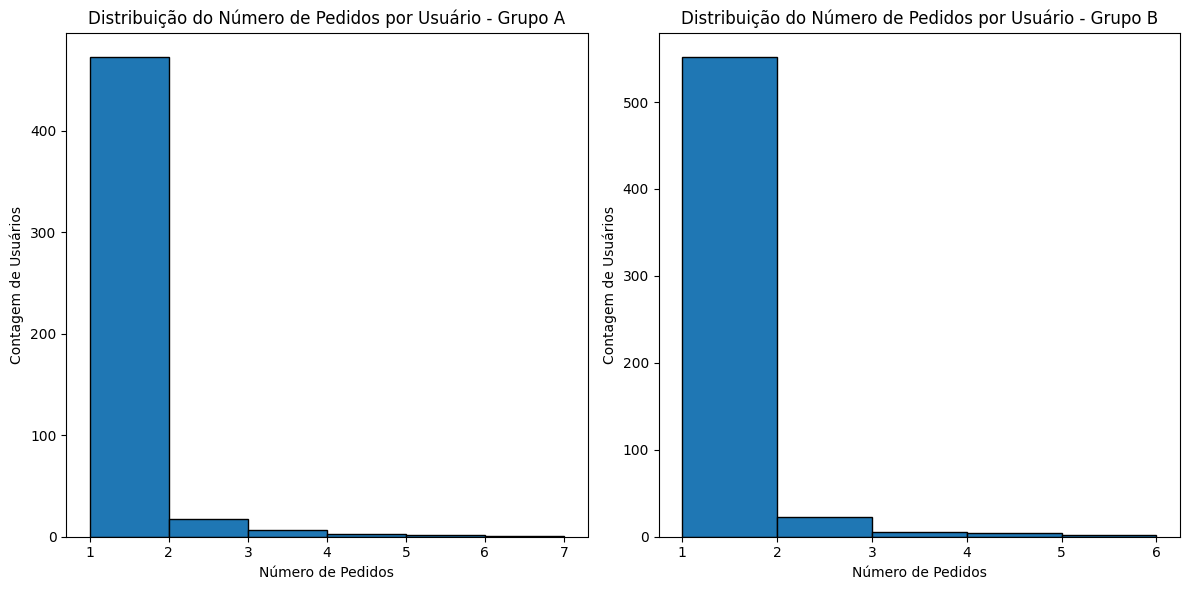

In [120]:
# Plotando os histogramas
plt.figure(figsize=(12, 6))

# Histograma para o grupo A
plt.subplot(1, 2, 1)
plt.hist(ordersByUsersA['orders'], bins=range(1, int(ordersByUsersA['orders'].max()) + 1), edgecolor='black')
plt.title('Distribuição do Número de Pedidos por Usuário - Grupo A')
plt.xlabel('Número de Pedidos')
plt.ylabel('Contagem de Usuários')

# Histograma para o grupo B
plt.subplot(1, 2, 2)
plt.hist(ordersByUsersB['orders'], bins=range(1, int(ordersByUsersB['orders'].max()) + 1), edgecolor='black')
plt.title('Distribuição do Número de Pedidos por Usuário - Grupo B')
plt.xlabel('Número de Pedidos')
plt.ylabel('Contagem de Usuários')

plt.tight_layout()
plt.show()

Para 95% dos usuários, o comportamento de compra é muito similar em ambos os grupos, com a maioria fazendo até 2 pedidos. A diferença no percentil 99 sugere que o grupo A tem alguns usuários que fazem um número maior de pedidos (até 4), enquanto no grupo B a maioria dos usuários faz no máximo 3 pedidos. Isso pode indicar a presença de usuários com comportamento de compra mais intensivo no grupo A.

* Os percentis 95 e 99 dos preços dos pedidos.

In [121]:
print(np.percentile(orders_df['revenue'], [95, 99]))

[435.54  900.904]


A maioria dos pedidos tem um preço relativamente baixo, com 95% deles sendo inferiores a 435,54. Existe uma pequena fração de pedidos (5%) que são significativamente mais caros, mas não ultrapassam 900,904 para 99% dos casos. Os pedidos que estão acima do percentil 99 (> 900,904) são considerados anomalias ou outliers. Eles representam os pedidos de maior valor e são muito raros.

* Promoções e Descontos: Pode ser vantajoso focar em promoções para produtos que estão próximos ou abaixo do percentil 95, já que estes são os mais comuns.

* Produtos Premium: Considerar uma estratégia específica para produtos que caem acima do percentil 95, pois atendem a um segmento de mercado disposto a gastar mais.

* Análise de Outliers: Os pedidos acima do percentil 99 devem ser analisados individualmente para entender o que os torna tão caros e se há uma oportunidade de aumentar essa categoria de pedidos.

In [122]:
# Calculando os percentis 95 e 99 para o grupo A
percentiles_A = np.percentile(orders_df[orders_df['group'] == 'A']['revenue'], [95, 99])
print(f"Percentis 95 e 99 para o grupo A: {percentiles_A}")

# Calculando os percentis 95 e 99 para o grupo B
percentiles_B = np.percentile(orders_df[orders_df['group'] == 'B']['revenue'], [95, 99])
print(f"Percentis 95 e 99 para o grupo B: {percentiles_B}")

Percentis 95 e 99 para o grupo A: [413.48  967.796]
Percentis 95 e 99 para o grupo B: [445.825 857.872]


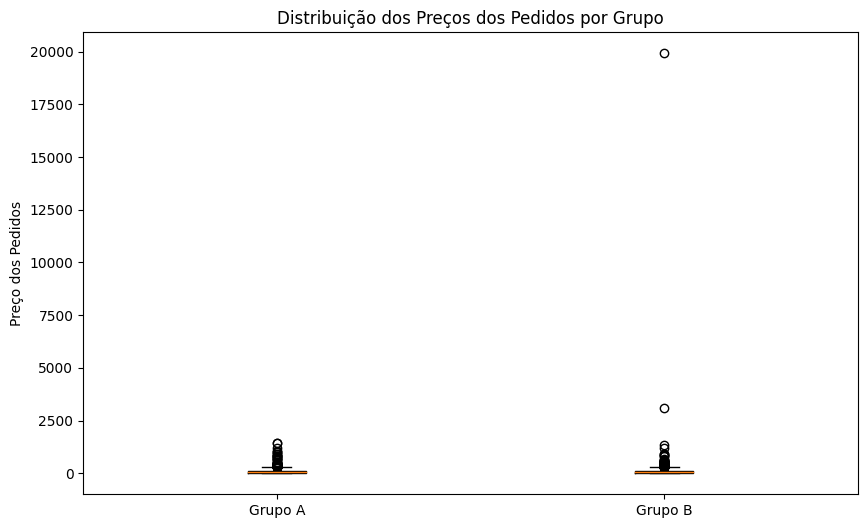

In [123]:
# Preparando os dados para o boxplot
data_to_plot = [orders_df[orders_df['group'] == 'A']['revenue'], orders_df[orders_df['group'] == 'B']['revenue']]

# Criando o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, labels=['Grupo A', 'Grupo B'])
plt.ylabel('Preço dos Pedidos')
plt.title('Distribuição dos Preços dos Pedidos por Grupo')
plt.show()

Para 95% dos pedidos, os valores no grupo B são ligeiramente mais altos do que no grupo A. A diferença no percentil 99 sugere que há alguns pedidos de valor significativamente mais alto no grupo A em comparação com o grupo B. Isso pode indicar a presença de pedidos excepcionalmente altos no grupo A que não estão presentes no grupo B.

Continuar comparando outras métricas importantes (como o número de pedidos por usuário e a taxa de conversão) entre os grupos, utilizando os dados filtrados para garantir que as análises não sejam distorcidas por anomalias.

* Gráfico de dispersão dos preços dos pedidos. 

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  19920.4     B
1196      3936777065  2108080724 2019-08-15   3120.1     B
858        192721366  1316129916 2019-08-27   1450.2     A
1136       666610489  1307669133 2019-08-13   1425.8     A
744       3668308183   888512513 2019-08-27   1335.6     B
662       1811671147  4266935830 2019-08-29   1220.2     A
682       1216533772  4266935830 2019-08-29   1220.2     B
743       3603576309  4133034833 2019-08-09   1050.0     A
1103      1348774318  1164614297 2019-08-12   1025.8     A
1099       316924019   148427295 2019-08-12   1015.9     A


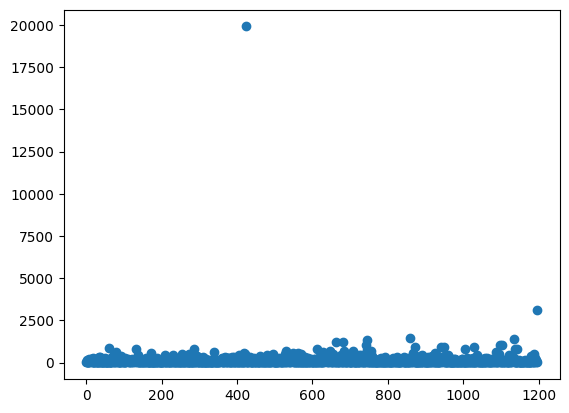

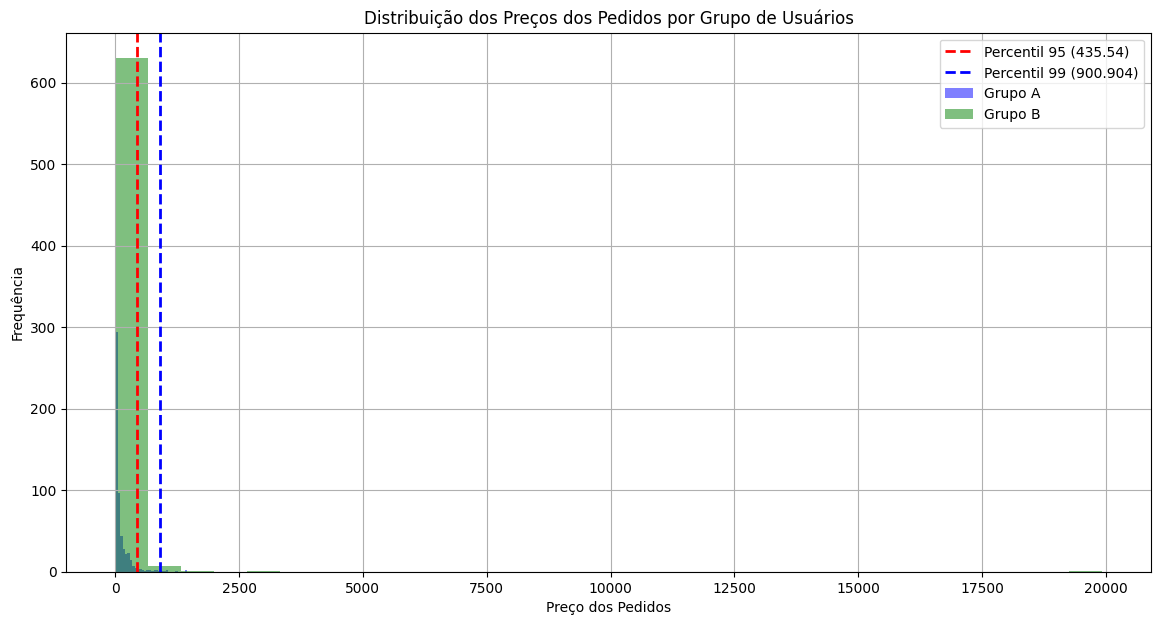

In [124]:
print(orders_df.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders_df['revenue'])))

plt.scatter(x_values, orders_df['revenue'])

# Definir percentis 95 e 99
percentil_95 = 435.54
percentil_99 = 900.904

plt.figure(figsize=(14, 7))

orders_group_a = orders_df[orders_df['group'] == 'A']
plt.hist(orders_group_a['revenue'], bins=30, alpha=0.5, label='Grupo A', color='blue') # Grupo A 

orders_group_b = orders_df[orders_df['group'] == 'B']
plt.hist(orders_group_b['revenue'], bins=30, alpha=0.5, label='Grupo B', color='green') # grupo B

# Marcar os percentis 95 e 99
plt.axvline(percentil_95, color='r', linestyle='dashed', linewidth=2, label='Percentil 95 (435.54)')
plt.axvline(percentil_99, color='b', linestyle='dashed', linewidth=2, label='Percentil 99 (900.904)')

plt.xlabel('Preço dos Pedidos')
plt.ylabel('Frequência')
plt.title('Distribuição dos Preços dos Pedidos por Grupo de Usuários')
plt.legend()
plt.grid(True)
plt.show()

O gráfico de distribuição mostra como os preços dos pedidos estão distribuídos. Pedidos acima do percentil 95 são considerados anomalias leve e pedidos acima do percentil 99 são considerados anomalias severas.

Pedidos com valores altos podem estar associados a eventos promocionais ou grandes compras feitas durante promoções. Alguns produtos podem ter preços naturalmente altos, resultando em pedidos com valores elevados.

* A significância estatística da diferença na conversão entre os grupos usando os dados brutos.

In [125]:
ordersByUsersA = orders_df[orders_df['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = orders_df[orders_df['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_df[visits_df['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits_df[visits_df['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.01679
0.138


Para a análise de significância estatística da diferença na conversão entre os grupos, definimos as hipóteses da seguinte maneira:
* Hipótese Nula: Não há diferença na taxa de conversão entre os grupos A e B. 
* Hipótese Alternativa: Há uma diferença na taxa de conversão entre os grupos A e B. 

Um p-valor de 0.01679 indica que há aproximadamente 1.679% de chance de observar uma diferença na conversão tão extrema quanto a observada, assumindo que a hipótese nula é verdadeira. O ganho de conversão relativo para o grupo B, comparado com o grupo A, é 13.8%. 

A diferença de 13.8% na conversão é substancial. Dependendo do contexto do seu negócio, isso pode representar um impacto significativo na receita e no sucesso das suas estratégias de marketing ou outras intervenções.

* A significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados brutos.

In [126]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders_df[orders_df['group']=='A']['revenue'], orders_df[orders_df['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders_df[orders_df['group']=='B']['revenue'].mean()/orders_df[orders_df['group']=='A']['revenue'].mean()-1))

0.692
0.252


Neste caso, o p-valor de 0.692 é muito maior que 0.05, indicando que não podemos rejeitar a hipótese nula. Ou seja, não há evidência estatística suficiente para afirmar que existe uma diferença significativa no tamanho médio do pedido entre os grupos.
A diferença no tamanho médio do pedido de 0.252 sugere que há uma diferença absoluta de 0.252 unidades monetárias (por exemplo, dólares) no tamanho médio do pedido entre os grupos.

Dado que não há uma diferença significativa no tamanho médio do pedido, é importante reavaliar as intervenções ou estratégias aplicadas aos grupos para entender por que não houve um impacto significativo. Podemos considerar a repetição do teste com uma amostra maior ou por um período mais longo para verificar se os resultados são consistentes.

* A significância estatística da diferença na conversão entre os grupos usando os dados filtrados. 

In [127]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 10000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits_df[visits_df['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.01254
0.168


Dado que o p-valor é menor que 0.05, podemos concluir que a diferença na conversão entre os grupos é estatisticamente significativa. Isso significa que a diferença observada não é devida ao acaso e que há uma verdadeira diferença na taxa de conversão entre os grupos.
A diferença de 16.8% na conversão é substancial. Dependendo do contexto do seu negócio, isso pode representar um impacto significativo na receita e no sucesso das suas estratégias de marketing ou outras intervenções.

Avaliar o impacto da diferença de conversão em termos de KPIs relevantes. É válido repetir o teste A/B ou aplicar outras técnicas de validação para garantir que os resultados são consistentes e reproduzíveis e investigar os fatores que contribuíram para a diferença de conversão.

* A significância estatística da diferença no tamanho médio do pedido entre os grupos usando os dados filtrados.

In [128]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders_df[orders_df['revenue'] > 10000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

print('{0:.3f}'.format(stats.mannwhitneyu(
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'],
    orders_df[np.logical_and(
        orders_df['group']=='B',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'])[1]))

print('{0:.3f}'.format(
    orders_df[np.logical_and(orders_df['group']=='B',np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders_df[np.logical_and(
        orders_df['group']=='A',
        np.logical_not(orders_df['visitor_id'].isin(abnormalUsers)))]['revenue'].mean() - 1))

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitor_id, dtype: int64
0.670
-0.055


Para realizar a análise de significância estatística, formulamos as seguintes hipóteses:
* Hipótese Nula (H0): Não há diferença no tamanho médio do pedido entre os grupos A e B. Ou seja, a diferença no tamanho médio do pedido é igual a zero.
* Hipótese Alternativa (H1): Há uma diferença no tamanho médio do pedido entre os grupos A e B. Ou seja, a diferença no tamanho médio do pedido não é igual a zero.

O p-valor de 0.670 é muito maior que 0.05, indicando que não podemos rejeitar a hipótese nula. Ou seja, não há evidência estatística suficiente para afirmar que existe uma diferença significativa no tamanho médio do pedido entre os grupos.
A diferença no tamanho médio do pedido de -0.055 sugere que o tamanho médio do pedido no grupo B é 0.055 unidades monetárias menor (por exemplo, dólares) do que no grupo A. Esta diferença é muito pequena.

Dado que não há uma diferença significativa no tamanho médio do pedido, é importante reavaliar as intervenções ou estratégias aplicadas aos grupos para entender por que não houve um impacto significativo.

# Conclusão Geral

Para tomar uma decisão sobre o teste A/B com base nos resultados obtidos, primeiro, precisamos considerar que a diferença na conversão entre os grupos é estatisticamente significativa, com o grupo B apresentando uma conversão significativamente maior que o grupo A. Já a  diferença no tamanho médio do pedido entre os grupos não é estatisticamente significativa, indicando que não há uma diferença relevante no valor médio dos pedidos entre os grupos.

Em segundo lugar, existem algumas opções de decisão, como: considerar um dos grupos o líder, que não há diferença entre os grupos, e continuar o teste se eles forem inconclusivos ou se for necessário mais tempo para coletar dados e ter uma decisão mais clara. 

Com base nos resultados e nas análises acima, a recomendação seria: 

* Parar o teste e considere o grupo B o líder.

O grupo B tem uma taxa de conversão significativamente maior que o grupo A (p-valor de 0.01679 e diferença de 13.8%). Isso é uma métrica crítica e sugere que o grupo B está gerando mais pedidos. Embora não haja diferença significativa no tamanho médio do pedido, a taxa de conversão mais alta no grupo B é um indicador forte de melhor desempenho geral. Continuar o teste quando uma métrica chave já mostrou uma diferença significativa pode não ser a melhor utilização de recursos.

Aumentar a conversão pode ter um impacto mais imediato e significativo na receita total do que pequenas variações no tamanho médio do pedido, especialmente quando a diferença no tamanho médio do pedido não é significativa. Portanto, implementar as estratégias usadas no grupo B para toda a população pode potencialmente aumentar as vendas e a receita da empresa.
